In [ ]:
%matplotlib inline
from IPython import display
import torch
from matplotlib import pyplot as plt
import random
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


# EDA

In [ ]:
df = pd.read_csv('housing.csv',sep=',')
headers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing.csv', sep='\s+', names= headers)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
target = 'MEDV'
features = [x for x in df.columns if x !=target]

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

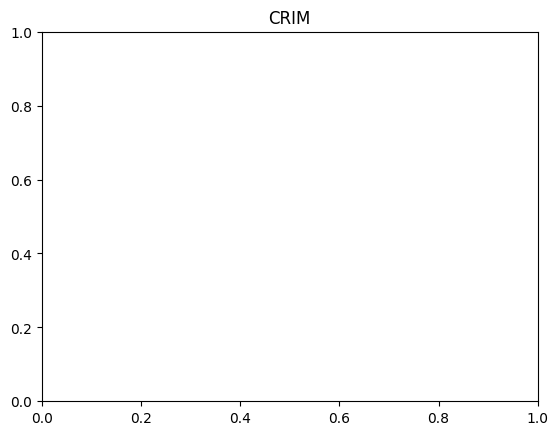

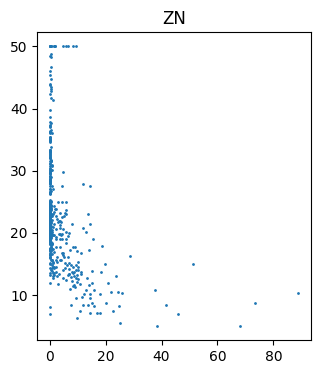

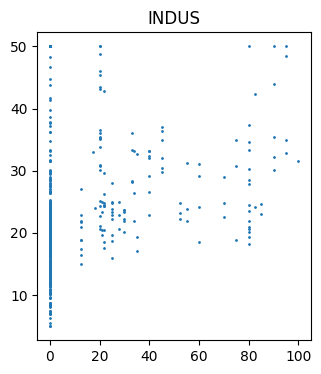

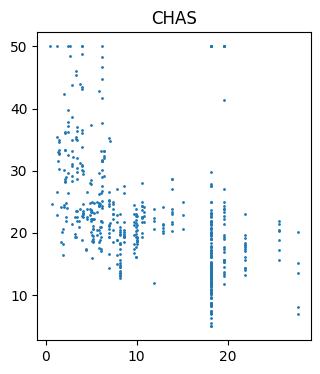

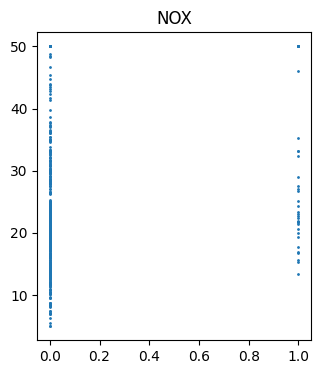

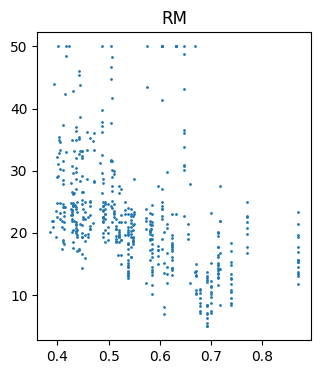

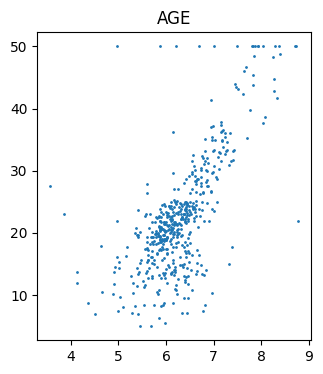

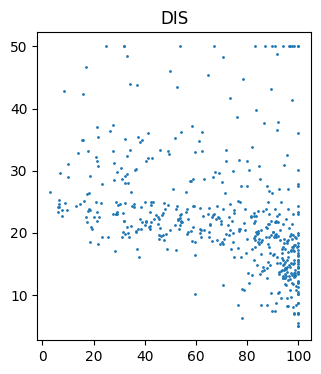

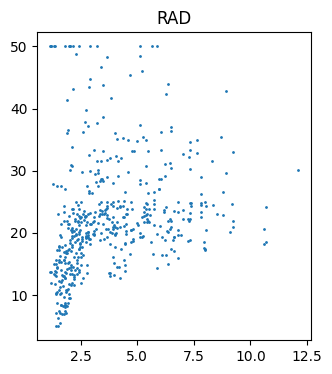

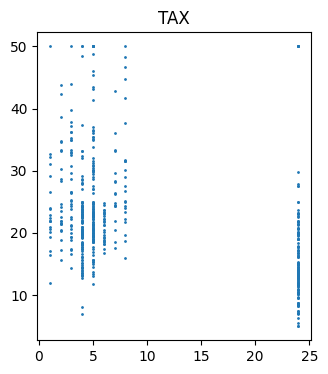

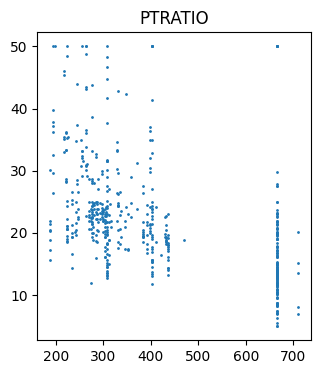

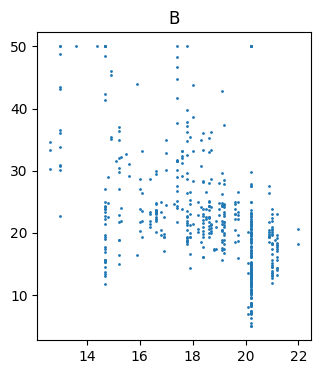

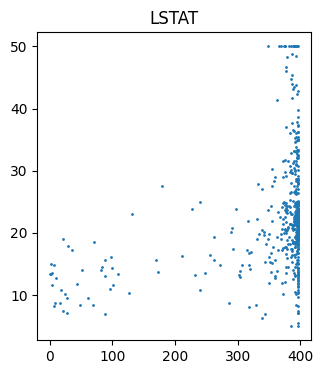

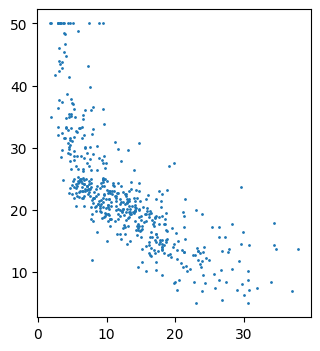

In [ ]:
for j,i in enumerate(features):
  if df[i].dtype == object:
    continue
  plt.title(i)
  plt.figure(figsize=(12,4))
  plt.subplot(131)
  plt.scatter(df[i],df[target],1)

plt.show()

<Axes: >

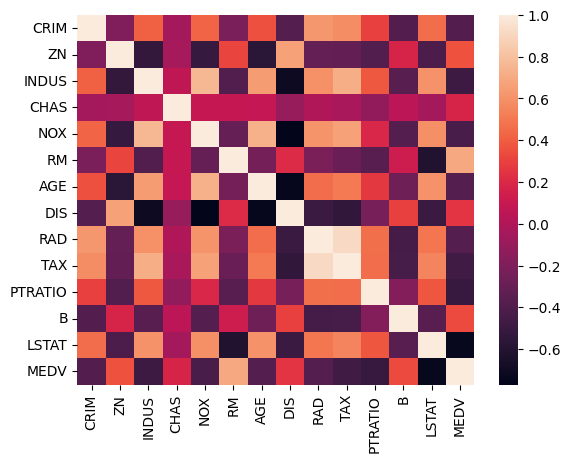

In [ ]:

sns.heatmap(df.corr())

# Learning

In [ ]:
features = [x for x in df.columns if x !=target]

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df[features]
y = df[target]
scale= StandardScaler()
X = scale.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy()
, test_size=0.33, random_state=42)

In [ ]:

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()


In [ ]:
def squared_loss(y_hay,y):
  return ((y_hay-y.reshape(y_hay.shape))**2).mean()

In [ ]:
def data_iter(batch_size,features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0,num_examples,batch_size):
    j = indices[i:min(i+batch_size,num_examples)]
    yield features[j,:],labels[j]


In [ ]:
def sgd(params,lr):
  for param in params:
    param.data[:] = param - lr*param.grad
def linreg(X,w,b):
  print(X.shape)
  return torch.mv(X,w) + b

In [ ]:
X_train.shape

torch.Size([339, 13])

In [ ]:
X_train.shape[1]

13

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
class Model_nn:
  def __init__(self,num_epoch=100,batch_size=100):
    self.num_epoch = num_epoch
    self.batch_size = batch_size
    self.model = None
  def fit(self,X_train,y_train):
    self.model = torch.nn.Sequential(torch.nn.Linear(X_train.shape[1],1))
    loss = torch.nn.MSELoss(reduction='mean')
    trainer = torch.optim.SGD(self.model.parameters(),lr=0.002)
    batch_size = 100
    dataset = TensorDataset(X_train,y_train)

    data_iter = DataLoader(dataset,batch_size,shuffle= True)
    for epoch in range(1, 1000):
      for X,y in data_iter:
        trainer.zero_grad()
        l = loss(self.model(X).reshape(-1),y)
        l.backward()
        trainer.step()
      l = loss(self.model(X_train).reshape(-1),y_train)
  def predict(self,X_test):
    return self.model(X_test).reshape(-1)
  def mse(self,y_true,y_pred):
    loss = torch.nn.MSELoss(reduction='mean')
    return loss(y_true,y_pred).item()

In [ ]:
model = Model_nn()
model.fit(X_train,y_train)

#TESTING

In [ ]:
y_pred = model.predict(X_test)
model.mse(y_test,y_pred)

21.197153091430664